In [2]:
import soundfile as sf

def load_audio(file_name):
    # Load the audio file
    data, samplerate = sf.read(file_name)
    return data, samplerate

# Files to load
files = ['PianoLaPeriod.wav', 'TrumpetLaPeriod.wav', 'ViolinLaPeriod.wav', 'FluteLaPeriod.wav']

# Load each file and print the sampling frequency
for file in files:
    data, samplerate = load_audio(file)
    print(f'Sampling Frequency for {file}: {samplerate} Hz')

    # Comment on the sampling frequency with regards to the Shannon-Nyquist theorem
    nyquist_frequency = samplerate / 2
    print(f'The Nyquist Frequency is {nyquist_frequency} Hz which is the highest frequency that can be accurately sampled.')


Sampling Frequency for PianoLaPeriod.wav: 56490 Hz
The Nyquist Frequency is 28245.0 Hz which is the highest frequency that can be accurately sampled.
Sampling Frequency for TrumpetLaPeriod.wav: 56544 Hz
The Nyquist Frequency is 28272.0 Hz which is the highest frequency that can be accurately sampled.
Sampling Frequency for ViolinLaPeriod.wav: 56558 Hz
The Nyquist Frequency is 28279.0 Hz which is the highest frequency that can be accurately sampled.
Sampling Frequency for FluteLaPeriod.wav: 56752 Hz
The Nyquist Frequency is 28376.0 Hz which is the highest frequency that can be accurately sampled.


In [3]:
import numpy as np
import soundfile as sf

def process_audio(file_name):
    # Load the audio file
    data, samplerate = sf.read(file_name)
    
    # Calculate the time interval between two values of the sound signal
    delta_t = 1.0 / samplerate
    print(f'Time interval for {file_name}: {delta_t} seconds')
    
    # Construct the time array
    num_samples = len(data)
    time_array = np.arange(0, num_samples) * delta_t
    return time_array

# Files to process
files = ['PianoLaPeriod.wav', 'TrumpetLaPeriod.wav', 'ViolinLaPeriod.wav', 'FluteLaPeriod.wav']

# Process each file
for file in files:
    time_array = process_audio(file)
    print(f'Time array for {file}: {time_array}')


Time interval for PianoLaPeriod.wav: 1.770224818551956e-05 seconds
Time array for PianoLaPeriod.wav: [0.00000000e+00 1.77022482e-05 3.54044964e-05 5.31067446e-05
 7.08089927e-05 8.85112409e-05 1.06213489e-04 1.23915737e-04
 1.41617985e-04 1.59320234e-04 1.77022482e-04 1.94724730e-04
 2.12426978e-04 2.30129226e-04 2.47831475e-04 2.65533723e-04
 2.83235971e-04 3.00938219e-04 3.18640467e-04 3.36342716e-04
 3.54044964e-04 3.71747212e-04 3.89449460e-04 4.07151708e-04
 4.24853956e-04 4.42556205e-04 4.60258453e-04 4.77960701e-04
 4.95662949e-04 5.13365197e-04 5.31067446e-04 5.48769694e-04
 5.66471942e-04 5.84174190e-04 6.01876438e-04 6.19578686e-04
 6.37280935e-04 6.54983183e-04 6.72685431e-04 6.90387679e-04
 7.08089927e-04 7.25792176e-04 7.43494424e-04 7.61196672e-04
 7.78898920e-04 7.96601168e-04 8.14303417e-04 8.32005665e-04
 8.49707913e-04 8.67410161e-04 8.85112409e-04 9.02814657e-04
 9.20516906e-04 9.38219154e-04 9.55921402e-04 9.73623650e-04
 9.91325898e-04 1.00902815e-03 1.02673039e-03

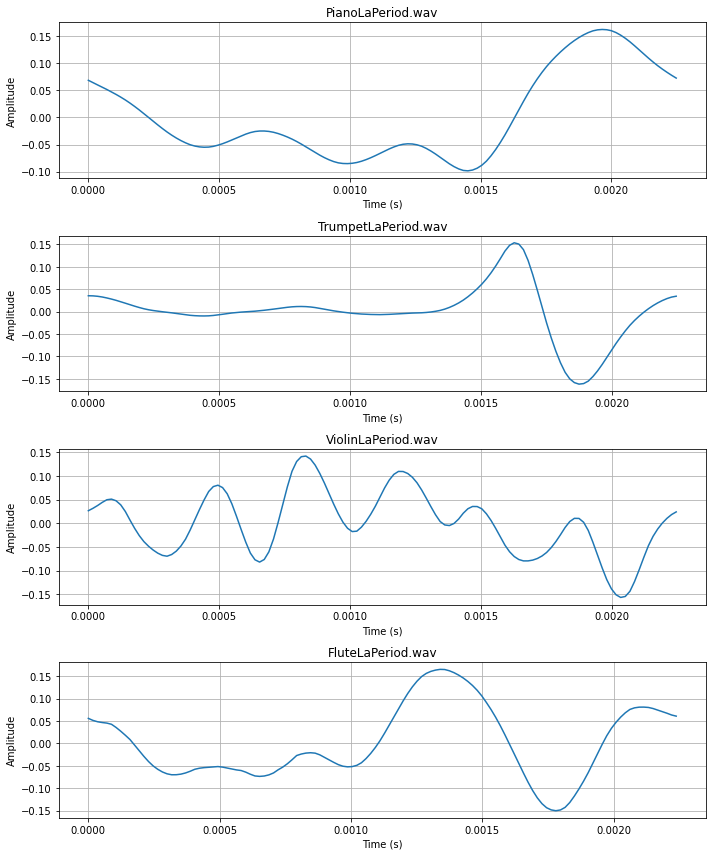

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

def load_audio(file_name):
    data, samplerate = sf.read(file_name)
    delta_t = 1.0 / samplerate
    num_samples = len(data)
    time_array = np.arange(0, num_samples) * delta_t
    return time_array, data

# Files to process
files = ['PianoLaPeriod.wav', 'TrumpetLaPeriod.wav', 'ViolinLaPeriod.wav', 'FluteLaPeriod.wav']

# Create a new figure
plt.figure(figsize=(10, 12))

# Process each file and plot the sound signals in separate subplots
for index, file in enumerate(files, start=1):
    plt.subplot(4, 1, index)
    time_array, data = load_audio(file)
    plt.plot(time_array, data)
    plt.title(file)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()  # Adjusts the space between plots for better readability
plt.show()


In [7]:
import numpy as np
import soundfile as sf
from IPython.display import Audio, display

def load_audio(file_name):
    data, samplerate = sf.read(file_name)
    return data, samplerate

def play_extended_audio(file_name):
    data, samplerate = load_audio(file_name)
    
    # Repeat the audio data to create 1000 periods
    extended_data = np.tile(data, 1000)
    
    # Play the extended audio
    display(Audio(extended_data, rate=samplerate))

# Files to process
files = ['PianoLaPeriod.wav', 'TrumpetLaPeriod.wav', 'ViolinLaPeriod.wav', 'FluteLaPeriod.wav']

# Play extended audio for each file
for file in files:
    print(f'Playing extended audio for {file}:')
    play_extended_audio(file)


Playing extended audio for PianoLaPeriod.wav:


Playing extended audio for TrumpetLaPeriod.wav:


Playing extended audio for ViolinLaPeriod.wav:


Playing extended audio for FluteLaPeriod.wav:


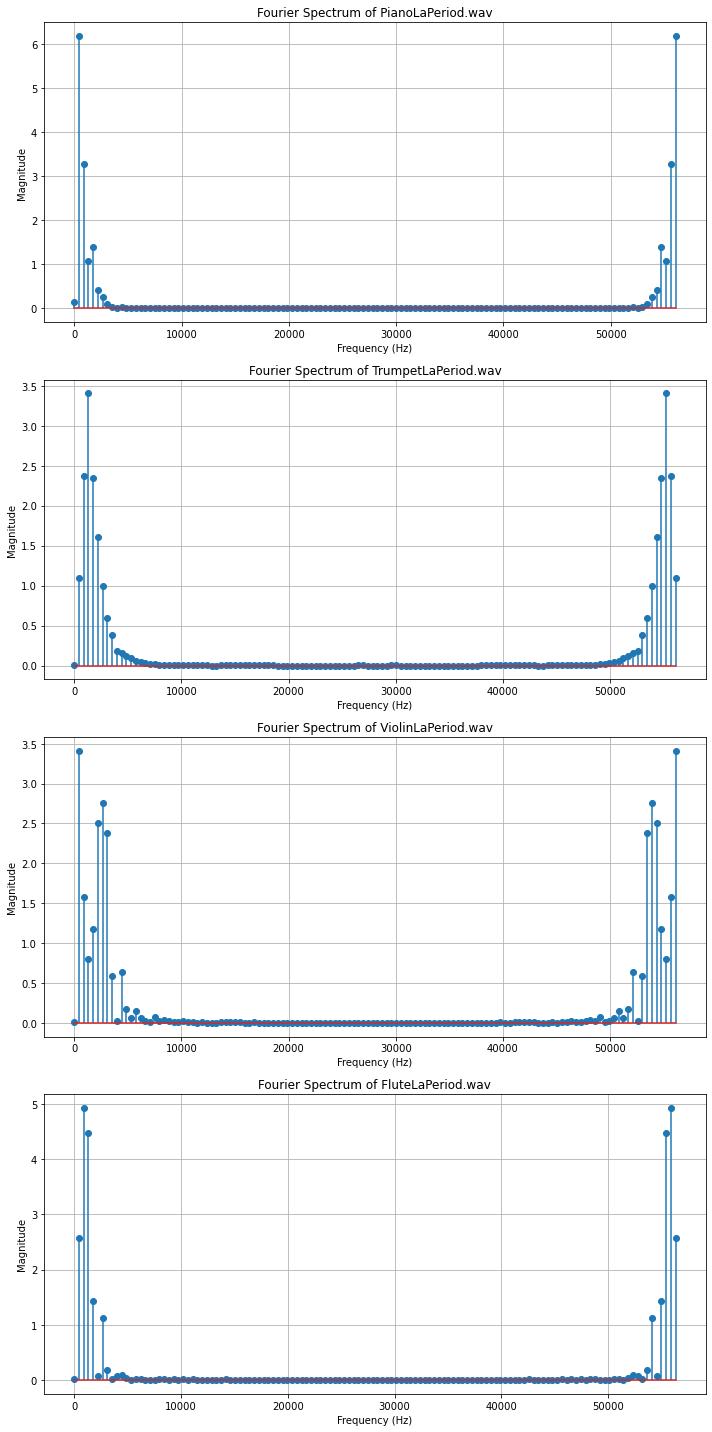

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Function to load audio
def load_audio(file_name):
    data, samplerate = sf.read(file_name)
    return data, samplerate

# Files to process
files = ['PianoLaPeriod.wav', 'TrumpetLaPeriod.wav', 'ViolinLaPeriod.wav', 'FluteLaPeriod.wav']

# Dictionary to hold the Fourier Transform and sampling rate of each signal
fourier_transforms = {}
samplerates = {}

# Process each file and compute the Fourier Transform
for file in files:
    data, samplerate = load_audio(file)
    fourier_transforms[file] = np.fft.fft(data)
    samplerates[file] = samplerate  # Store the sampling rate

# Create a new figure
plt.figure(figsize=(10, 20))

# Process each file and plot the Fourier Spectrum in separate subplots
for index, file in enumerate(files, start=1):
    plt.subplot(4, 1, index)
    
    # Get the sampling rate for the current file
    samplerate = samplerates[file]
    
    # Compute the frequency axis
    N = len(fourier_transforms[file])
    freqs = np.arange(0, N) * samplerate / N
    
    # Plot the Fourier Spectrum using the stem function
    plt.stem(freqs, np.abs(fourier_transforms[file]), use_line_collection=True)
    plt.title(f'Fourier Spectrum of {file}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.tight_layout()  # Adjusts the space between plots for better readability
plt.show()


In [22]:
from IPython.display import Audio
import numpy as np
import scipy.fftpack
import soundfile as sf
import matplotlib.pyplot as plt

def analyze_and_play(file_name):
    # Load the audio file
    data, samplerate = sf.read(file_name)

    # If stereo, select only one channel (e.g., the left channel)
    if len(data.shape) > 1 and data.shape[1] > 1:
        data = data[:, 0]

    # Ensure the audio data is a floating point type
    data = data.astype(float)
    
    # Normalize the audio data to the range [-1, 1]
    data = data / np.max(np.abs(data), axis=0)

    # Compute the Fourier Transform of the audio data to find the frequency spectrum
    fft_result = scipy.fftpack.fft(data)
    fft_freqs = scipy.fftpack.fftfreq(len(fft_result), 1.0/samplerate)

    # Find the peak frequency (ignore DC component at index 0)
    peak_freq_index = np.argmax(np.abs(fft_result[1:])) + 1
    peak_freq = fft_freqs[peak_freq_index]

    # Print the peak frequency
    print(f'Peak Frequency for {file_name}: {peak_freq} Hz')

    # Play the audio
    return Audio(data, rate=samplerate)

# Files to analyze
files = ['PianoLa.aif', 'TrumpetLa.aif', 'ViolinLa.aif', 'FluteLa.aif']

# Analyze and play each file
for file in files:
    audio = analyze_and_play(file)
    display(audio)


Peak Frequency for PianoLa.aif: 440.6476581912829 Hz


Peak Frequency for TrumpetLa.aif: 1325.4410130743822 Hz


Peak Frequency for ViolinLa.aif: 442.3014481459835 Hz


Peak Frequency for FluteLa.aif: 884.4947287220365 Hz


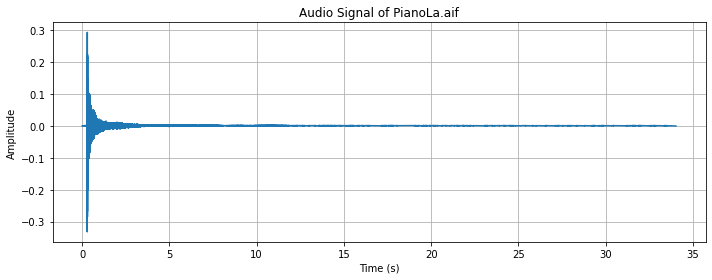

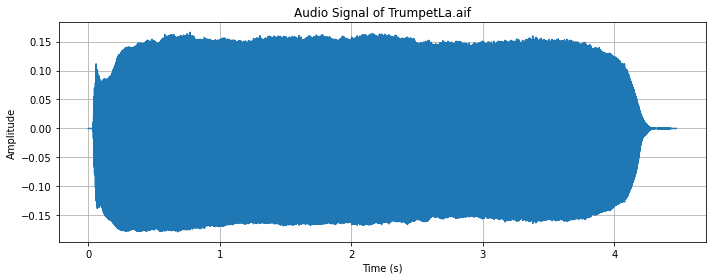

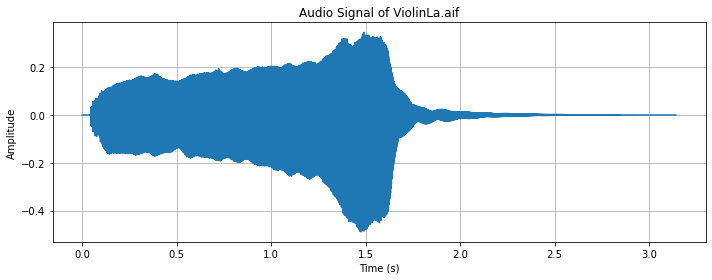

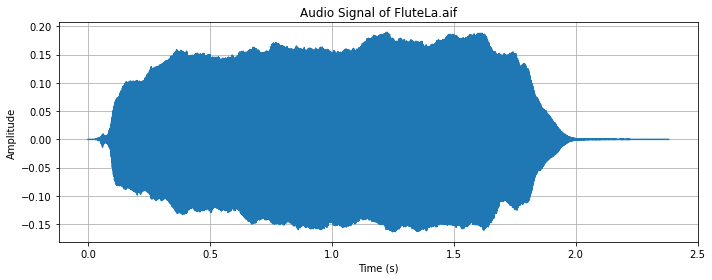

In [23]:
import numpy as np
import scipy.fftpack
import soundfile as sf
from IPython.display import Audio
import matplotlib.pyplot as plt
def analyze_and_plot(file_name):
    # Load the audio file
    data, samplerate = sf.read(file_name)

    # Select the left channel (column 0) if stereo, or just use the data if mono
    if len(data.shape) > 1 and data.shape[1] > 1:
        channel_data = data[:, 0]
    else:
        channel_data = data

    # Create time axis in seconds
    time_axis = np.arange(0, len(channel_data)) / samplerate

    # Plot the audio signal
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, channel_data)
    plt.title(f'Audio Signal of {file_name}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.tight_layout()
    plt.show()

# List of files to analyze
files = ['PianoLa.aif', 'TrumpetLa.aif', 'ViolinLa.aif', 'FluteLa.aif']

# Analyze and plot each file
for file in files:
    analyze_and_plot(file)

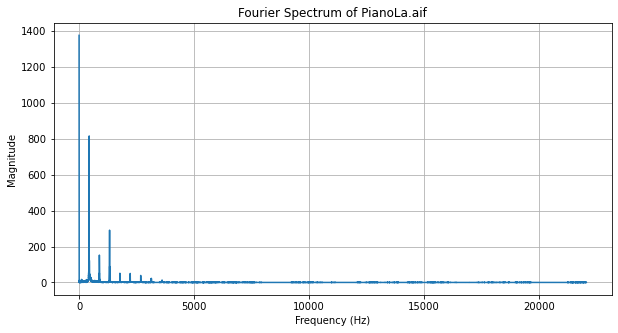

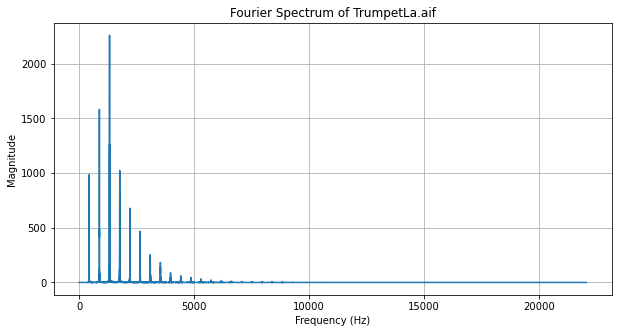

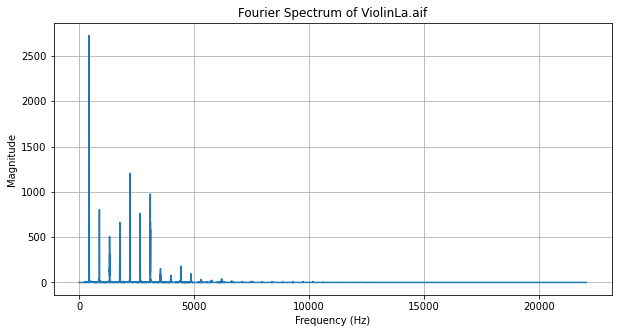

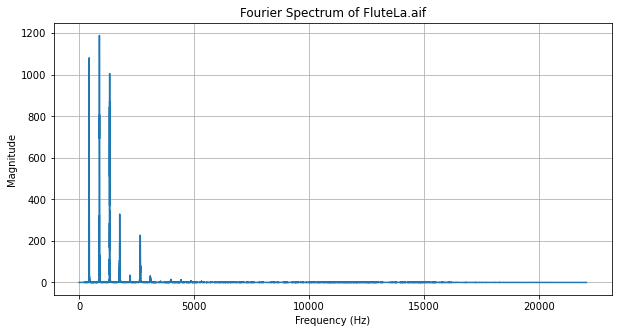

In [1]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt
import soundfile as sf

def plot_fourier_spectrum(file_name):
    # Load the audio file
    data, samplerate = sf.read(file_name)

    # Select one channel (e.g., the left channel) of the stereo recording
    left_channel = data[:, 0]

    # Compute the Fourier Transform
    fft_result = scipy.fftpack.fft(left_channel)
    
    # Create the frequency axis for plotting
    freqs = np.fft.fftfreq(len(fft_result), 1.0 / samplerate)
    
    # Only keep positive frequencies (real part)
    pos_freqs = freqs[freqs >= 0]
    pos_fft_result = np.abs(fft_result[freqs >= 0])  # Taking the magnitude (abs) for plotting
    
    # Plot the Fourier Spectrum
    plt.figure(figsize=(10, 5))
    plt.plot(pos_freqs, pos_fft_result)
    plt.title(f'Fourier Spectrum of {file_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

# Files to analyze
files = ['PianoLa.aif', 'TrumpetLa.aif', 'ViolinLa.aif', 'FluteLa.aif']

# Analyze and plot the Fourier spectrum for each file
for file in files:
    plot_fourier_spectrum(file)


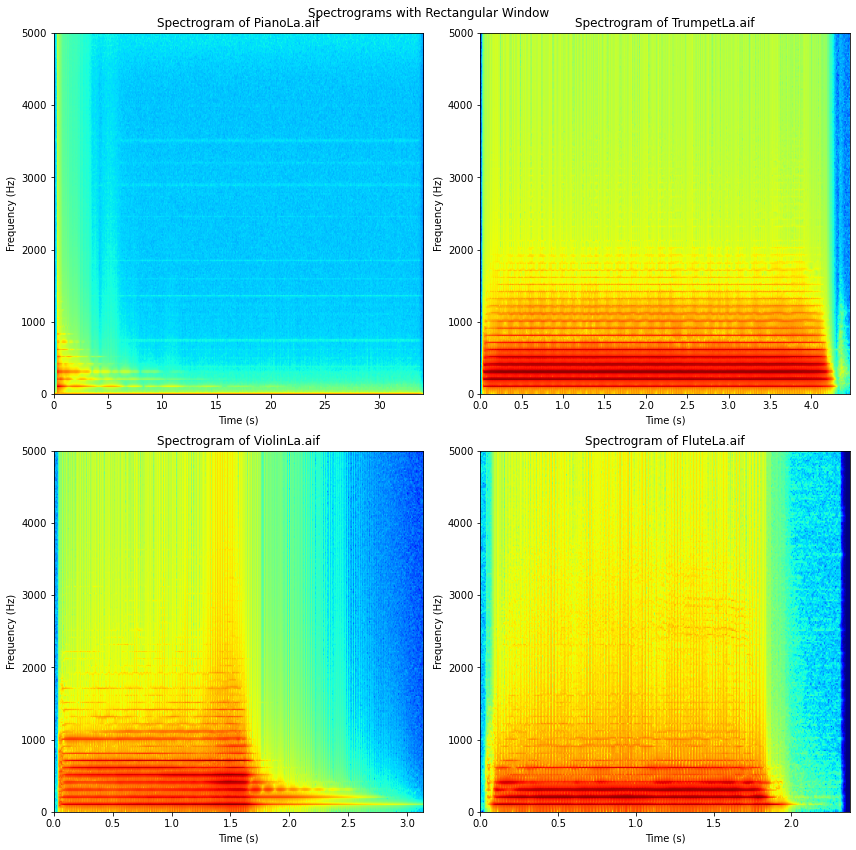

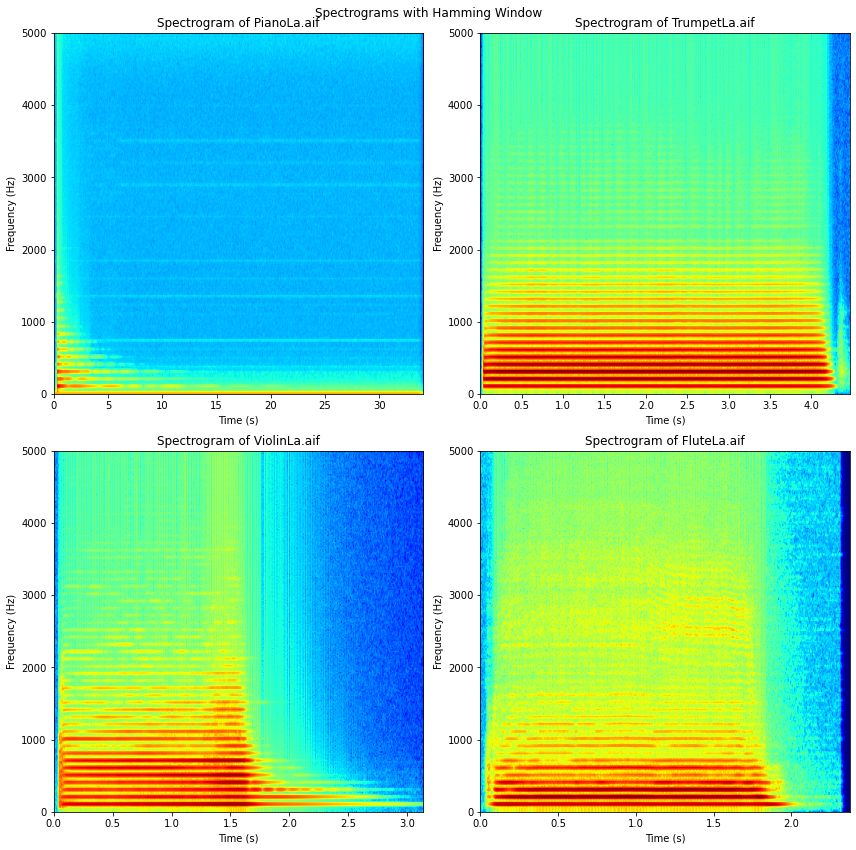

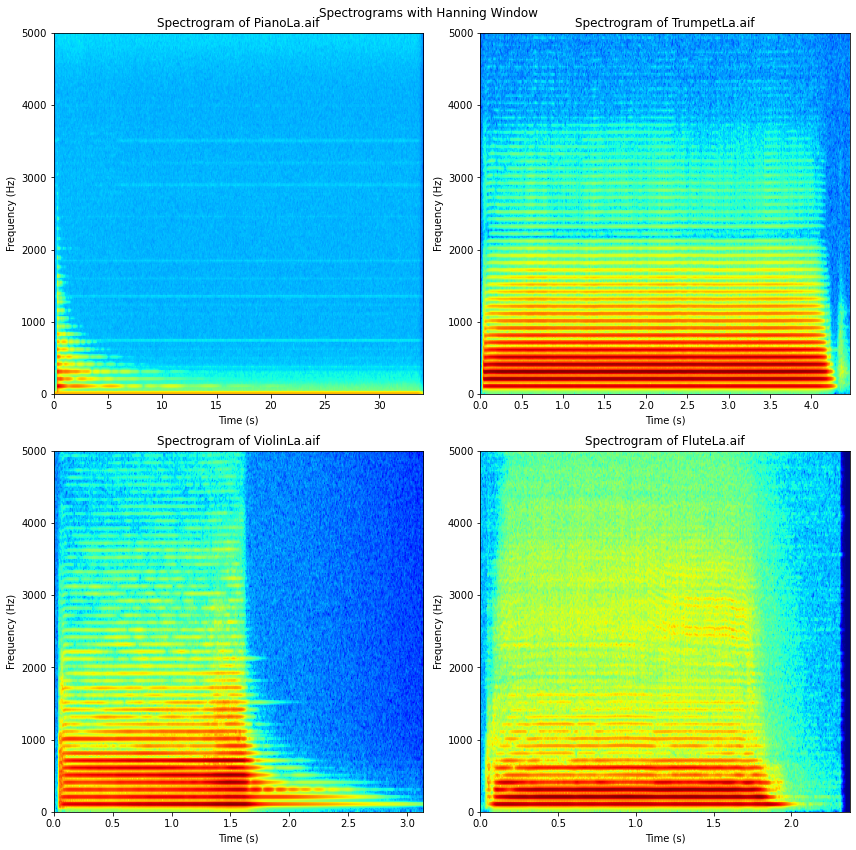

In [43]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def nextpow2(n):
    return int(2**np.ceil(np.log2(n)))

def compute_spectrogram(file_name, window_type='rectangular'):  # Added window_type parameter
    # Load the audio data
    data, samplerate = sf.read(file_name)
    
    # Ensure the data is mono
    if len(data.shape) > 1 and data.shape[1] > 1:
        data = data[:, 0]
    
    # Get the next power of 2 for window size (assuming 10ms response time)
    Nw = nextpow2(int(0.01 * samplerate))
    
    # Calculate the number of shifts
    number_of_shifts = int((len(data) / (Nw / 4)) - 1)
    
    # Initialize the spectrogram matrix
    spectrogram_matrix = np.zeros((Nw, number_of_shifts))
    
    # Select window function
    if window_type == 'hamming':
        window_function = np.hamming(Nw)
    elif window_type == 'hanning':
        window_function = np.hanning(Nw)
    else:
        window_function = np.ones(Nw)  # Rectangular window
    
     # Fill the spectrogram matrix
    for i in range(number_of_shifts):
        start_index = int(i * (Nw / 4))
        end_index = start_index + Nw
        segment = data[start_index:end_index]

        # Pad the segment with zeros if necessary
        if len(segment) < Nw:
            segment = np.pad(segment, (0, Nw - len(segment)), mode='constant')

        window = segment * window_function
        fft_result = np.fft.fft(window, n=Nw)
        spectrogram_matrix[:, i] = np.abs(fft_result)

    return spectrogram_matrix


# List of audio files
files = ['PianoLa.aif', 'TrumpetLa.aif', 'ViolinLa.aif', 'FluteLa.aif']

# Iterate through each file and compute the spectrogram using different window functions
for window_type in ['rectangular', 'hamming', 'hanning']:
    plt.figure(figsize=(12, 12))
    for index, file in enumerate(files, start=1):
        spectrogram_matrix = compute_spectrogram(file, window_type=window_type)  # Passed window_type argument
    
        # Build time and frequency axes
        Nw, number_of_shifts = spectrogram_matrix.shape
        time_axis = np.arange(number_of_shifts) * (Nw / 4) / 44100  # assuming a sampling rate of 44.1 kHz
        freq_axis = np.linspace(0, 44100 / 2, Nw // 2)  # assuming a sampling rate of 44.1 kHz
        
        # Create a subplot
        ax = plt.subplot(2, 2, index)
        
        # Display the spectrogram (limiting frequency range to 5000 Hz)
        ax.imshow(
            20 * np.log10(spectrogram_matrix[:Nw // 2, :] + 1e-6),
            aspect='auto',
            origin='lower',
            cmap='jet',
            extent=[time_axis[0], time_axis[-1], freq_axis[0], 5000]  # limiting frequency range to 5000 Hz
        )
    
        # Add labels and title
        ax.set_title(f'Spectrogram of {file}')
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency (Hz)')

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.suptitle(f'Spectrograms with {window_type.capitalize()} Window')
    plt.subplots_adjust(top=0.95)  # Adjust title position
    plt.show()
